In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([[2],
              [3],
              [4],
              [5]])

In [3]:
np.insert(a, 0, 1, axis=0)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [4]:
np.vstack((np.array([[1]]), 
                             np.random.rand(5, 1)))

array([[1.        ],
       [0.14445294],
       [0.72147937],
       [0.81691412],
       [0.44989608],
       [0.61745226]])

In [5]:
rng = np.random.default_rng(seed=1)

In [6]:
n_samples = 101
X = np.linspace(0, 30, n_samples).reshape(n_samples, 1)
y = 2 * X + 3 + 16 * (rng.random((n_samples, 1))-0.5)

In [7]:
X_padded = np.insert(X, 0, 1, axis=1)
X_padded[:5, :]

array([[1. , 0. ],
       [1. , 0.3],
       [1. , 0.6],
       [1. , 0.9],
       [1. , 1.2]])

In [8]:
theta = rng.random((2, 1))
theta

array([[0.43122675],
       [0.86732051]])

In [9]:
theta.T @ X_padded[3]

array([1.2118152])

In [10]:
y[3]

array([11.97839115])

In [11]:
np.c_[X_padded[:10], y[:10]]

array([[ 1.        ,  0.        ,  3.189146  ],
       [ 1.        ,  0.3       , 10.80741914],
       [ 1.        ,  0.6       , -1.4934462 ],
       [ 1.        ,  0.9       , 11.97839115],
       [ 1.        ,  1.2       ,  2.38930323],
       [ 1.        ,  1.5       ,  4.77322318],
       [ 1.        ,  1.8       , 11.8432415 ],
       [ 1.        ,  2.1       ,  5.74718618],
       [ 1.        ,  2.4       ,  8.593499  ],
       [ 1.        ,  2.7       ,  0.84094581]])

In [12]:
total_error = X_padded @ theta - y
np.c_[total_error, X_padded][:5]

array([[ -2.75791925,   1.        ,   0.        ],
       [-10.11599624,   1.        ,   0.3       ],
       [  2.44506525,   1.        ,   0.6       ],
       [-10.76657595,   1.        ,   0.9       ],
       [ -0.91729188,   1.        ,   1.2       ]])

In [13]:
X_padded.T @ total_error

array([[ -1998.82773982],
       [-38550.04797795]])

In [14]:
def eta_schedule(n_epochs):
    eta = 1e-2 / (1 + n_epochs)
    return eta

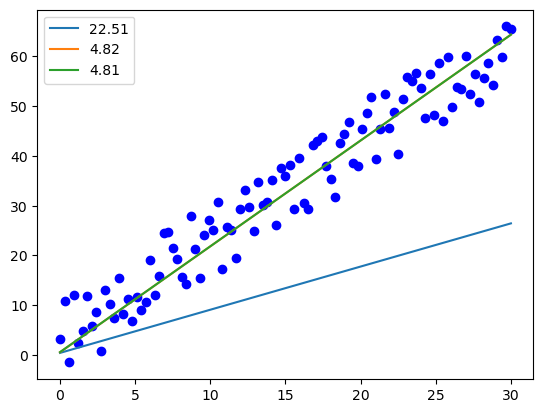

In [15]:
m = X_padded.shape[0]
cumulative_eta = 0
for generation in range(3):
    y_pred = X_padded @ theta
    rmse = np.round(np.linalg.norm(y_pred - y) / np.sqrt(m), 2)
    plt.plot(X, y_pred, label=f"{rmse}")
    for epoch in range(100):
        eta = eta_schedule(100 * generation + epoch)
        cumulative_eta += eta
        total_error = X_padded @ theta - y
        nabla = (2 / m) * X_padded.T@total_error
        nabla = np.reshape(nabla, (2, 1))
        theta = theta - eta * nabla

plt.scatter(X, y, c="b")
plt.legend()
plt.show()

In [16]:
cumulative_eta

0.06282663880299506